# **File Upload**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving salesweekly.csv to salesweekly.csv


# **Pyramid Arima Package**

In [2]:
import warnings

import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid

pd.plotting.register_matplotlib_converters()

warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.2 MB/s eta 0:00:00


# **Parameters for ARIMA Model**

In [ ]:
import statsmodels.api as sm
df = pd.read_csv('salesweekly.csv')
warnings.filterwarnings("ignore")
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    resDiff = sm.tsa.arma_order_select_ic(df[x], max_ar=5, max_ma=5, ic='aic', trend='c')
    print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q,M01AB) = (np.int64(3), np.int64(3)) is the best.
ARMA(p,q,M01AE) = (np.int64(2), np.int64(0)) is the best.
ARMA(p,q,N02BA) = (np.int64(3), np.int64(3)) is the best.
ARMA(p,q,N02BE) = (np.int64(2), np.int64(2)) is the best.
ARMA(p,q,N05B) = (np.int64(4), np.int64(3)) is the best.
ARMA(p,q,N05C) = (np.int64(3), np.int64(2)) is the best.
ARMA(p,q,R03) = (np.int64(1), np.int64(1)) is the best.
ARMA(p,q,R06) = (np.int64(2), np.int64(2)) is the best.


# **Rolling forecasting with ARIMA model**

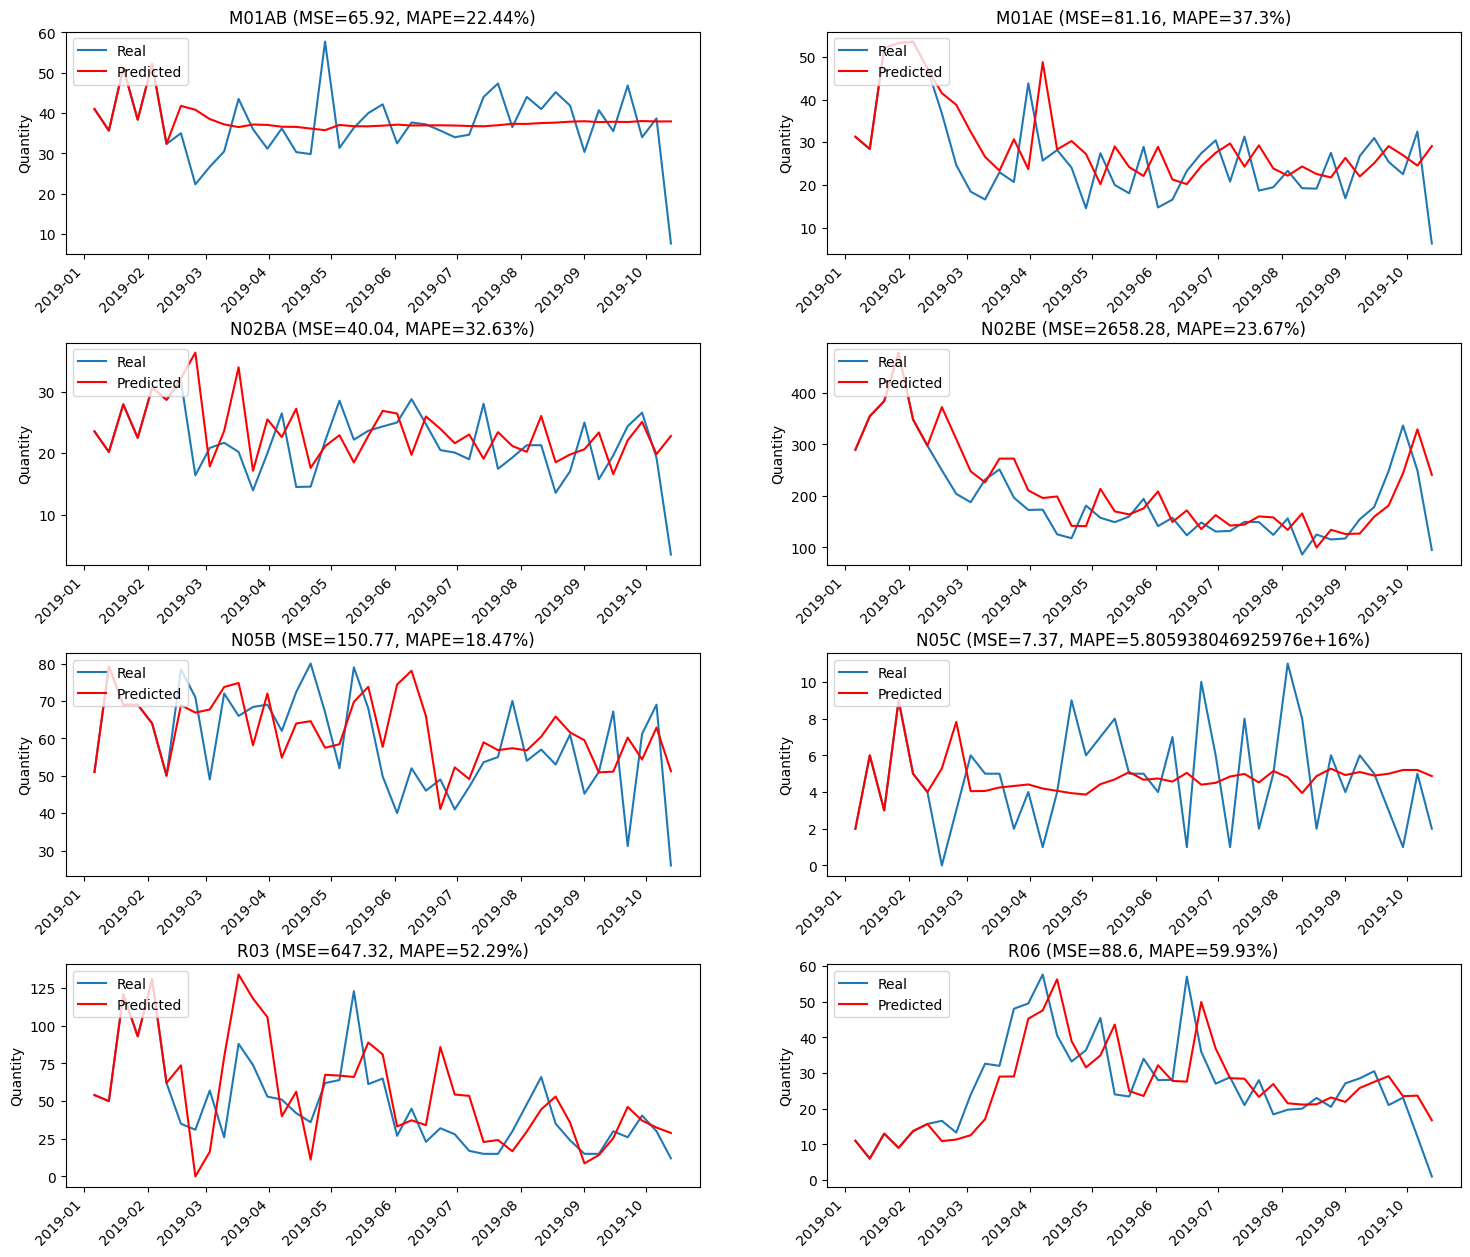


Results Summary:
                M01AB      M01AE      N02BA        N02BE        N05B  \
ARIMA MSE   65.921106  81.155518  40.040807  2658.282805  150.774779   
ARIMA MAPE   0.224410   0.372959   0.326319     0.236655    0.184725   

                    N05C         R03        R06  
ARIMA MSE   7.366251e+00  647.321798  88.603069  
ARIMA MAPE  5.805938e+14    0.522929   0.599263  


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

df = pd.read_csv("salesweekly.csv", parse_dates=["datum"])
df = df.rename(columns={"datum": "Date"})
df = df.set_index("Date")
df = df.loc["2019-01":"2019-10"]

M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':2,'d':0,'q':0}
N02BA= {'series':'N02BA','p':5,'d':1,'q':1}
N02BE= {'series':'N02BE','p':2,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':5}
N05C= {'series':'N05C','p':0,'d':0,'q':1}
R03= {'series':'R03','p':5,'d':1,'q':1}
R06= {'series':'R06','p':1,'d':0,'q':1}

resultsRollingdf = pd.DataFrame()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
warnings.filterwarnings("ignore")

for config in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    rowindex = math.floor(subplotindex/numcols)
    colindex = subplotindex - (rowindex*numcols)

    series = df[config['series']].dropna()
    X = series.values
    dates = series.index
    history = []
    predictions = []

    for t in range(len(X)):
        if len(history) > 5:
            model = ARIMA(history, order=(config['p'], config['d'], config['q']))
            model_fit = model.fit()
            yhat = model_fit.forecast(steps=1)[0]
        else:
            yhat = X[t]
        predictions.append(yhat)
        history.append(X[t])

    error = mean_squared_error(X, predictions)
    perror = mean_absolute_percentage_error(X, predictions)

    resultsRollingdf.loc['ARIMA MSE',config['series']] = error
    resultsRollingdf.loc['ARIMA MAPE',config['series']] = perror

    ax[rowindex,colindex].set_title(
        f"{config['series']} (MSE={round(error,2)}, MAPE={round(perror*100,2)}%)"
    )
    ax[rowindex,colindex].plot(dates, X, label="Real")
    ax[rowindex,colindex].plot(dates, predictions, color="red", label="Predicted")
    ax[rowindex,colindex].legend(loc='upper left')
    #ax[rowindex,colindex].set_xlabel("2019 Jan–Oct")
    ax[rowindex,colindex].set_ylabel("Quantity")
    ax[rowindex,colindex].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax[rowindex,colindex].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.setp(ax[rowindex,colindex].xaxis.get_majorticklabels(), rotation=45, ha="right")

    subplotindex += 1

plt.show()

print("\nResults Summary:")
print(resultsRollingdf)


# **Long-Term Forecasting with Arima**

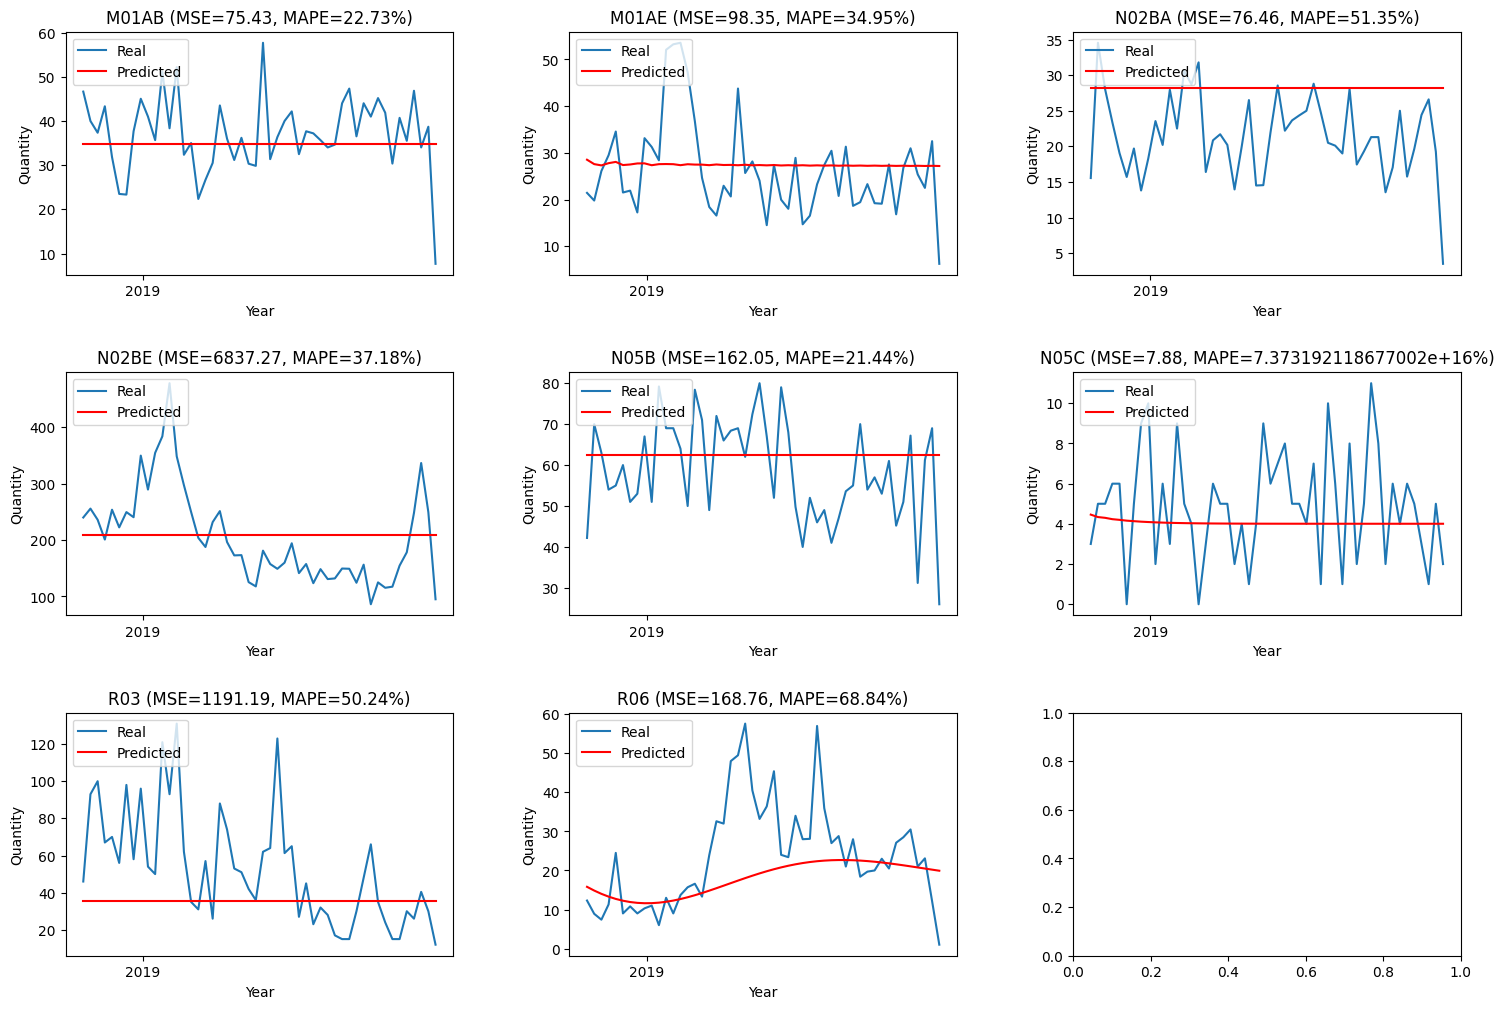


📊 Forecast Accuracy Results:
                M01AB      M01AE      N02BA        N02BE        N05B  \
ARIMA MSE   75.428967  98.353602  76.460923  6837.269518  162.050908   
ARIMA MAPE   0.227272   0.349511    0.51351     0.371757     0.21443   

                           N05C          R03         R06  
ARIMA MSE               7.87521  1191.186637  168.763771  
ARIMA MAPE  737319211867700.125     0.502438    0.688389  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.dates as mdates

df = pd.read_csv("salesweekly.csv", parse_dates=["datum"])
df = df.rename(columns={"datum": "Date"})
df = df.set_index("Date")

M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':4,'d':0,'q':4}
N02BA= {'series':'N02BA','p':0,'d':0,'q':0}
N02BE= {'series':'N02BE','p':0,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':0}
N05C= {'series':'N05C','p':2,'d':0,'q':2}
R03= {'series':'R03','p':0,'d':0,'q':0}
R06= {'series':'R06','p':2,'d':0,'q':2}

resultsLongtermdf = pd.DataFrame(index=['ARIMA MSE','ARIMA MAPE'],
                                 columns=[x['series'] for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]])

subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

warnings.filterwarnings("ignore")

for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    series = df[x['series']].dropna()
    X = series.values
    dates = series.index

    size = int(len(X) - 50)
    train, test = X[0:size], X[size:]
    test_dates = dates[size:]

    model = ARIMA(train, order=(x['p'],x['d'],x['q']))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test))

    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, forecast)

    resultsLongtermdf.loc['ARIMA MSE',x['series']] = error
    resultsLongtermdf.loc['ARIMA MAPE',x['series']] = perror

    ax[rowindex,colindex].set_title(
        x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror*100,2)) +'%)'
    )
    ax[rowindex,colindex].plot(test_dates, test, label='Real')
    ax[rowindex,colindex].plot(test_dates, forecast, color='red', label='Predicted')
    ax[rowindex,colindex].legend(loc='upper left')

    ax[rowindex,colindex].xaxis.set_major_locator(mdates.YearLocator())
    ax[rowindex,colindex].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax[rowindex,colindex].set_xlabel("Year")
    ax[rowindex,colindex].set_ylabel("Quantity")

    subplotindex=subplotindex+1

plt.show()

print("\n📊 Forecast Accuracy Results:")
print(resultsLongtermdf)


 Long-term forecasting with Auto-ARIMA model


In [2]:
!pip install pmdarima


  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.5 MB/s eta 0:00:00


Auto - Arima Model(Sarima)

# **Long-Term forecasting with Auto-ARIMA model**

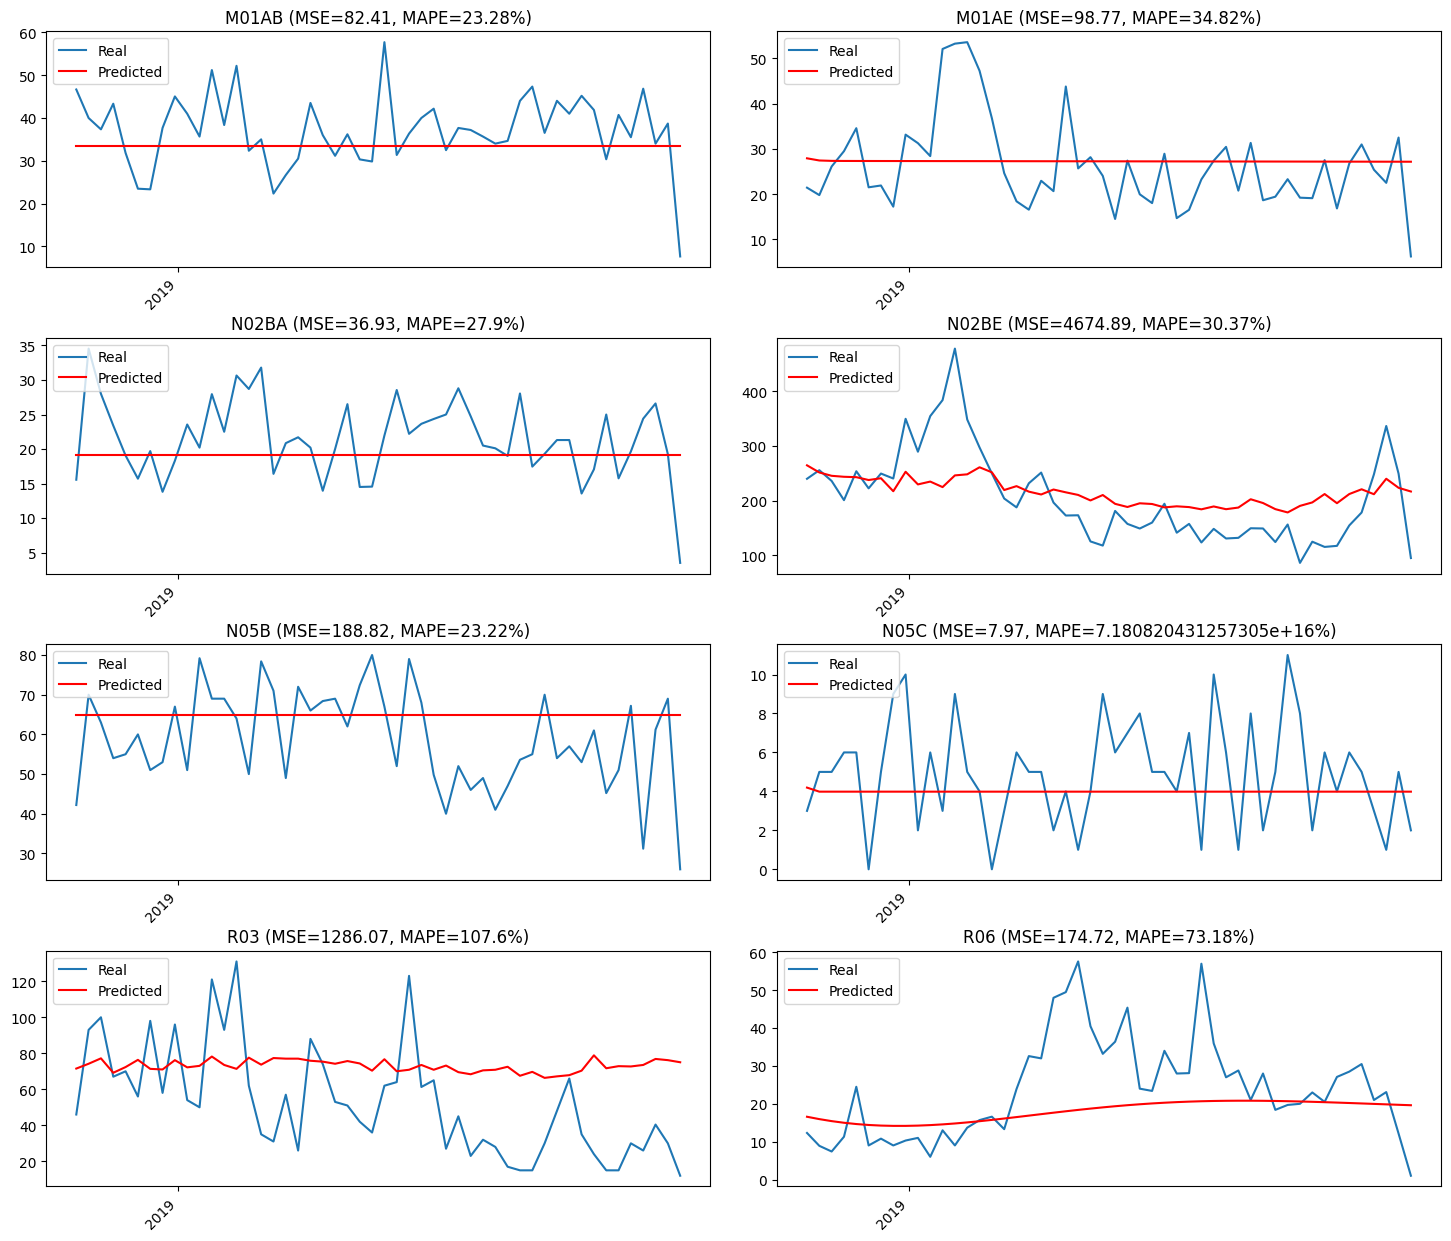


📊 Forecasting Error Summary:

                    M01AB      M01AE      N02BA        N02BE        N05B  \
AutoARIMA MSE   82.408909  98.766121  36.927450  4674.890645  188.820502   
AutoARIMA MAPE   0.232843   0.348160   0.279025     0.303714    0.232193   

                        N05C          R03         R06  
AutoARIMA MSE   7.974191e+00  1286.071138  174.721302  
AutoARIMA MAPE  7.180820e+14     1.075953    0.731840  


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima

df = pd.read_csv('salesweekly.csv', parse_dates=['datum'])
df = df.rename(columns={'datum': 'Date'})
df = df.set_index('Date')
resultsLongtermdf = pd.DataFrame()

subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex = math.floor(subplotindex / numcols)
    colindex = subplotindex - (rowindex * numcols)

    series = df[x].dropna()
    X = series.values
    dates = series.index

    size = int(len(X) - 50)
    train, test = X[0:size], X[size:]
    test_dates = dates[size:]

    if x in ['N02BE', 'R03', 'R06']:
        model = auto_arima(train, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5,
                           seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
    else:
        model = auto_arima(train, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

    forecast = model.predict(n_periods=len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, forecast)
    resultsLongtermdf.loc['AutoARIMA MSE', x] = error
    resultsLongtermdf.loc['AutoARIMA MAPE', x] = perror

    ax[rowindex, colindex].set_title(f"{x} (MSE={round(error,2)}, MAPE={round(perror*100,2)}%)")
    ax[rowindex, colindex].plot(test_dates, test, label='Real')
    ax[rowindex, colindex].plot(test_dates, forecast, color='red', label='Predicted')
    ax[rowindex, colindex].legend(loc='upper left')
    ax[rowindex, colindex].xaxis.set_major_locator(mdates.YearLocator())
    ax[rowindex, colindex].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(ax[rowindex, colindex].xaxis.get_majorticklabels(), rotation=45, ha="right")

    subplotindex += 1

plt.show()

print("\n📊 Forecasting Error Summary:\n")
print(resultsLongtermdf)


In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4
!pip install --upgrade --force-reinstall pmdarima==2.0.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C
